# 2. Analyse en Composante Principale (ACP)

## Objectif 


Identifier les principaux axes expliquant la variance dans l'adoption des énergies renouvelables à partir d'indicateurs économiques et sociaux .

## Questions posées


    1. Quels sont les principaux facteurs expliquant les variations dans l'adoption des énergies renouvelables (PIB, éducation, etc.) ?
	2. Quels axes principaux peuvent être extraits des indicateurs économiques  et sociaux pour expliquer la transition énergétique ?
	3. Les données quantitatives révèlent-elles des regroupements clairs de pays en fonction de leur progression énergétique ?

## Données nécessaires :


    -Investissements dans les énergies renouvelables (% du PIB) : EG.ELC.RNWX.ZS.
    -PIB par habitant (en USD) : NY.GDP.PCAP.CD.
    -Taux de scolarisation dans le secondaire (% net) : SE.SEC.NENR

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

### Chargement des données et Selection des Données Nécéssaires

In [2]:
import pandas as pd

# Lecture du fichier CSV
data = pd.read_csv("transition_energetique_pays_2023.csv")

# Sélection des colonnes spécifiques
data_acp = data[[
    "Investissements en énergies renouvelables (% du PIB)",
    "PIB par habitant (USD)",
    "Taux de scolarisation secondaire (%)"
]]

# Affichage des données sélectionnées
print(data_acp.head())

   Investissements en énergies renouvelables (% du PIB)  \
0                                           4.838663      
1                                           1.346697      
2                                           0.335375      
3                                           0.000000      
4                                           0.018654      

   PIB par habitant (USD)  Taux de scolarisation secondaire (%)  
0              415.707417                             47.154018  
1             1659.515290                             69.520690  
2             1568.724310                             69.520690  
3             8575.171134                             86.322940  
4             5364.027950                             69.520690  


### Centrage et Réduction

On met les données sur une échelle comparable pour effectuer une analyse significative.

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_acp)
X_scaled

array([[ 0.00000000e+00, -6.64204788e-01, -1.08333473e+00],
       [-5.56648825e-01, -6.21588845e-01,  0.00000000e+00],
       [-7.17862138e-01, -6.24699569e-01,  0.00000000e+00],
       [-7.71323769e-01, -3.84641324e-01,  8.13820719e-01],
       [-7.68350221e-01, -4.94663054e-01,  0.00000000e+00],
       [ 0.00000000e+00, -2.38413723e-01,  0.00000000e+00],
       [ 0.00000000e+00,  9.25462631e-01,  0.00000000e+00],
       [-7.71323769e-01, -5.99364677e-01, -2.82038544e+00],
       [ 0.00000000e+00,  6.80321858e-02,  8.21124145e-01],
       [-7.17053417e-01, -4.28598740e-01, -3.57664092e-01],
       [-4.67202465e-01, -1.92349610e-01,  8.42783226e-01],
       [-7.61951172e-01, -4.02531837e-01,  9.98003403e-01],
       [ 0.00000000e+00,  4.85955259e-01,  3.59663010e-01],
       [ 1.30114006e-01,  1.54247725e+00,  1.12579409e+00],
       [ 1.22243991e+00,  1.24140126e+00,  8.30934518e-01],
       [-7.42578418e-01, -4.34296653e-01,  9.20844156e-01],
       [ 0.00000000e+00,  5.51455339e-01

### Calcul de la Matrice de Corrélation

Identification des relations entre nos variables.

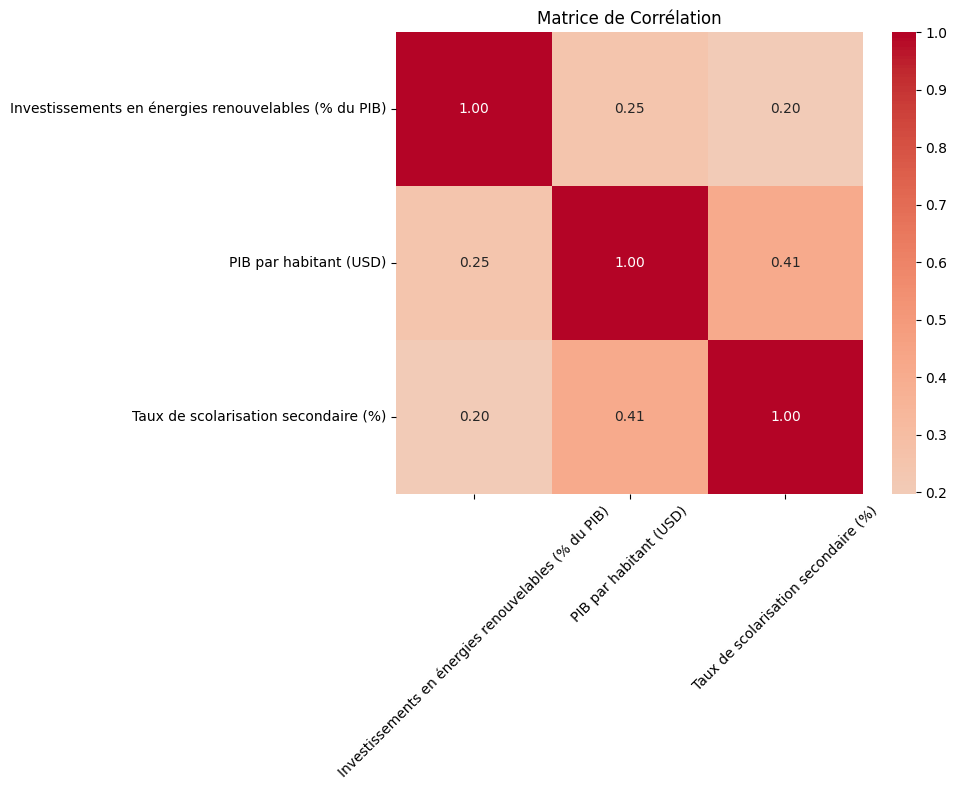

In [4]:
corr_matrix = np.corrcoef(X_scaled.T)
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap="coolwarm", 
            center=0, 
            fmt=".2f",
            xticklabels=data_acp.columns,  # Ajout des noms des variables sur l'axe x
            yticklabels=data_acp.columns)  # Ajout des noms des variables sur l'axe y
plt.title("Matrice de Corrélation")
plt.xticks(rotation=45)  # Rotation des labels pour une meilleure lisibilité
plt.yticks(rotation=0)
plt.tight_layout()  # Ajustement automatique de la mise en page
plt.show()

#### Interprétation :


    -Groupes de variables fortement corrélées positivement (1.00) :
Aucune paire de variables n'a de corrélation fortement positive dans cette matrice mis à part les variables avec elles-mêmes bien évidemment.

    -Corrélations modérées (coefficients ≈ 0.3 à 0.41) :
PIB par habitant (USD) et Taux de scolarisation secondaire (%) : coefficient = 0.41.
    Cela indique une corrélation modérée : les pays ayant un PIB par habitant plus élevé ont tendance à avoir un meilleur taux de scolarisation dans le secondaire.

    -Corrélations faibles (coefficients ≈ 0.20 à 0.25) :
Investissements en énergies renouvelables (% du PIB) et PIB par habitant (USD) : coefficient = 0.25.
    Cette corrélation est faible, ce qui indique que la relation entre les deux variables est limitée.

Investissements en énergies renouvelables (% du PIB) et Taux de scolarisation secondaire (%) : coefficient = 0.20.
    Cela reflète une corrélation faible, suggérant une très légère tendance à ce que les investissements augmentent avec une meilleure scolarisation, mais cette relation est peu significative.

### Extraction des Valeurs Propres

On extrait ces valeurs afin d'obtenir les composantes principales

In [5]:
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)
eigenvalues_rounded = np.round(eigenvalues, 2)
eigenvectors_rounded = np.round(eigenvectors, 2)

print("Valeurs propres :", eigenvalues_rounded)
print("Vecteurs propres :\n", eigenvectors_rounded)

Valeurs propres : [1.58 0.83 0.58]
Vecteurs propres :
 [[ 0.48  0.87  0.12]
 [ 0.63 -0.24 -0.73]
 [ 0.61 -0.43  0.67]]


#### Interprétation

- La première valeur propre (**1.58**) est nettement dominante, représentant environ **53%** (1.58/3) de la variance totale.
- La deuxième valeur propre (**0.83**) représente environ **28%** de la variance.
- La dernière valeur propre est de (**0.58**),la plus faible parmi les valeurs présentes (**19%**) .

### Illustration des Composantes Principales

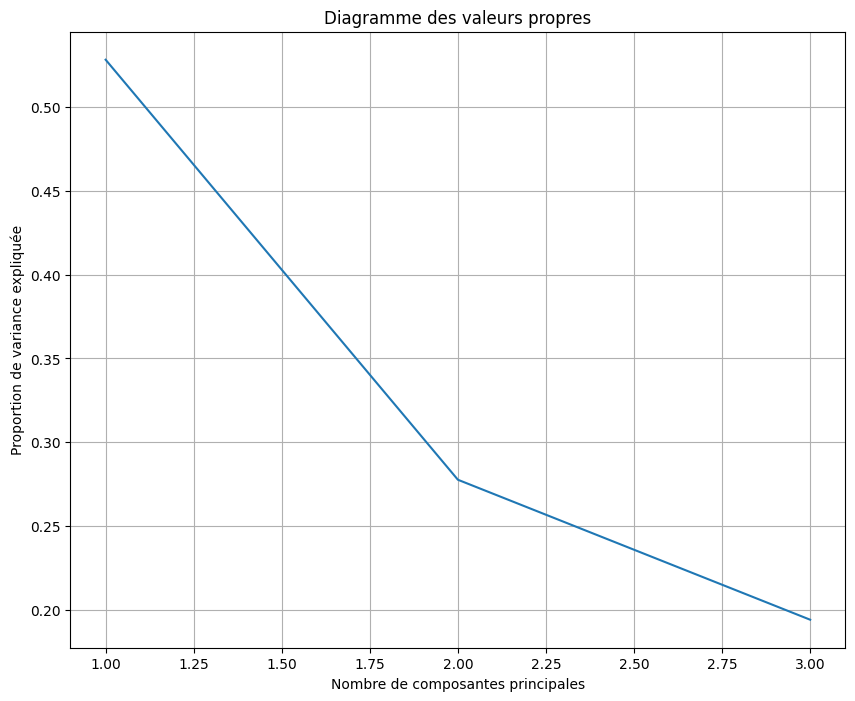

In [6]:
pca = PCA(n_components=len(data_acp.columns))
pca.fit(X_scaled)

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Proportion de variance expliquée')
plt.title('Diagramme des valeurs propres')
plt.grid()
plt.show()

#### Interprétation

#### Première composante (CP1) :

- Elle explique environ **53%** de la variance totale (proportion ≈ 0.53).
- C'est la composante la plus importante, ce qui indique qu'elle capture une grande partie des variations présentes dans les données

#### Deuxième composante (CP2) :

- Elle explique environ **28%** de la variance (proportion ≈ 0.28).
- La nette "rupture" visible après cette composante (effet du coude dans le graphique) montre qu'à partir de cette composante, l'information ajoutée est beaucoup moins significative.

#### Troisième composantes (CP3)  :

- Elles expliquent chacune moins de **19%** de la variance (proportion ≈ 0.19).
- Cette composante contribue relativement peu à la description des données et semble moins pertinente que les deux composantes précédentes pour une analyse principale.

---

#### Conclusions :

- Le "coude" très marqué après la deuxième composante montre clairement qu'il serait judicieux de conserver que **2 composantes principales**.
- Avec ces 2 composantes, on atteint une couverture de **81%** de la variance totale, ce qui est excellent pour une réduction dimensionnelle efficace.
- La réduction de dimension de **3 à 2 variables** permet de simplifier l'analyse tout en préservant l'essentiel des informations contenues dans les données.

### Application de l'ACP

#### 1. On réduit les données à deux dimensions principales pour simplifier l'analyse

In [7]:
# Application de l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#### 2. Affichage des nouvelles données projetées sur les composantes principales.

In [8]:
print("Nouvelles données après ACP :")
print(X_pca)

Nouvelles données après ACP :
[[-1.08059442e+00  6.26026718e-01]
 [-6.59576109e-01 -3.33776086e-01]
 [-7.38432656e-01 -4.73285335e-01]
 [-1.16319533e-01 -9.27382024e-01]
 [-6.80064161e-01 -5.48703606e-01]
 [-1.51160943e-01  5.77375726e-02]
 [ 5.86769092e-01 -2.24122862e-01]
 [-2.46474980e+00  6.85112089e-01]
 [ 5.42986096e-01 -3.69058553e-01]
 [-8.31438317e-01 -3.66494632e-01]
 [ 1.68267963e-01 -7.21787532e-01]
 [-1.10732095e-02 -9.93981143e-01]
 [ 5.27050733e-01 -2.72121555e-01]
 [ 1.72534307e+00 -7.43748165e-01]
 [ 1.87590073e+00  4.06145466e-01]
 [-6.89439100e-02 -9.36301947e-01]
 [ 3.45906031e-01 -1.30915599e-01]
 [ 4.01538629e-01 -1.14763103e+00]
 [-1.11074817e+00 -2.42678755e-01]
 [ 8.04349163e-01 -5.39247334e-01]
 [ 1.99956765e-01 -1.08674243e+00]
 [ 2.09942350e+00  3.63250848e-01]
 [-2.94011342e-01  1.20681378e-01]
 [-1.46103197e+00  4.54277686e-02]
 [ 2.18446627e+00 -7.95867911e-01]
 [-6.36082140e-01  3.31443991e-01]
 [-4.18035558e-01 -4.08757633e-01]
 [-6.10346107e-01 -5.7846

#### 3.Visualisation des données dans l'espace des deux premières composantes principales.

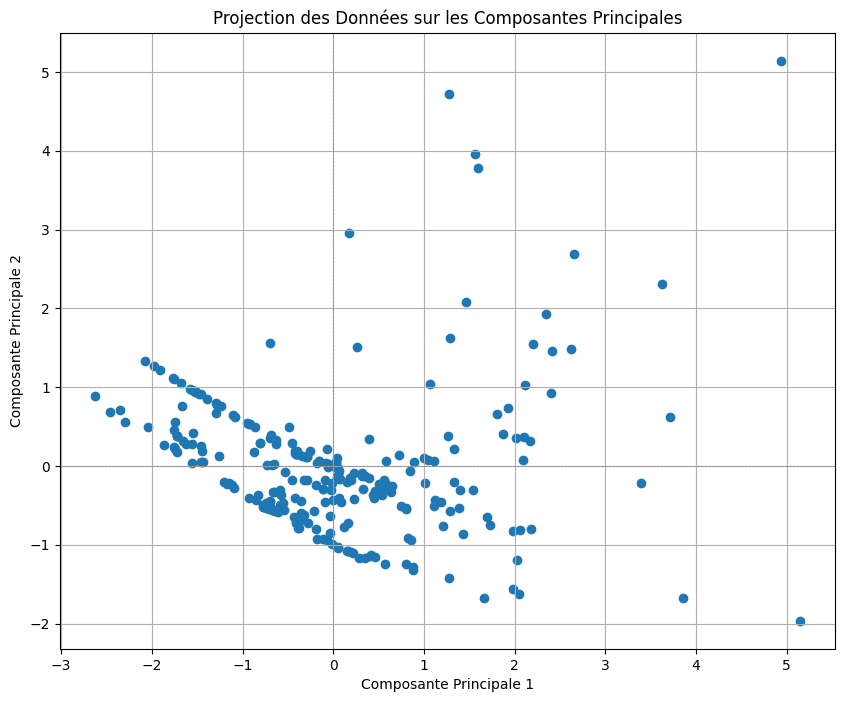

In [9]:

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des Données sur les Composantes Principales')
plt.grid()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)


plt.show()

#### Interprétation :
L'axe horizontal (Composante Principale 1) et l'axe vertical (Composante Principale 2) représentent les deux principales dimensions qui expliquent la plus grande part de variance dans les données. Ensemble, elles capturent environ 81% de la variance totale.

Distribution des Points :

Chaque point représente un pays. La position du point dans cet espace bidimensionnel montre comment le pays se situe par rapport aux deux composantes principales.

Les points qui sont proches les uns des autres dans ce graphique sont des pays qui présentent des similarités en termes des variables étudiées (Investissements en énergies renouvelables, PIB par habitant, et taux de scolarisation secondaire).

Sur CP1, la plupart des points s'étalent de -3 à 3, ce qui est une grande dispersion.
Pour CP3, la plupart des points s'étalent de -2 à 2, ce qui est une grande dispersion


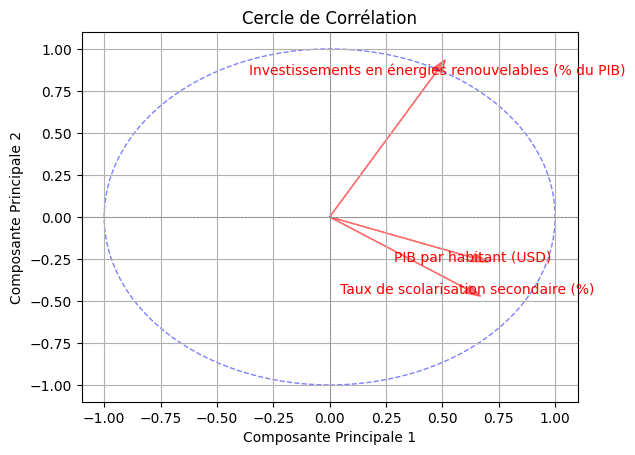

In [11]:
components = pca.components_
variables = ["Investissements en énergies renouvelables (% du PIB)", "PIB par habitant (USD)", "Taux de scolarisation secondaire (%)"]

for i, (x, y) in enumerate(components.T):
    plt.arrow(0, 0, x, y, color='r', alpha=0.5, head_width=0.05)
    plt.text(x, y, variables[i], color='r', ha='center', va='center')

# Tracer un cercle
circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--', alpha=0.5)
plt.gca().add_artist(circle)

# Ajuster les limites et ajouter des labels
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Cercle de Corrélation')
plt.grid()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()

#### Interprétation :


    -Investissements en énergies renouvelables et CP2: Il existe une corrélation forte et spécifique entre les investissements en énergies renouvelables et la deuxième composante principale. 
    
    -PIB par habitant et CP1: Le PIB par habitant est fortement corrélé à la première composante principale
    
    -Taux de scolarisation et CP1: Le taux de scolarisation est également corrélé à la première composante principale, mais moins fortement que le PIB.
    
    -Angle entre les vecteurs: L'angle quasi droit entre les vecteurs représentant les investissements en énergies renouvelables et les autres variables suggère que ces investissements sont relativement indépendants des autres facteurs considérés. Contrairement au PIB et le taux de scolarisatation secondaire qui indiquent une certaine corrélation vu le petit angle entre ces deux variables.
    
    -Les investissments sont le mieux  représentée dans ce plan (flèche plus longue).

    -La Composante Principale 1 (axe horizontal) est liée au PIB et le taux de scolarisation, bien que moins à cette dernière.
    - La Composante Principale 2 (axe vertical) est fortement influencée les investissments

# Réponse à la question 1: Quels sont les principaux facteurs expliquant les variations dans l'adoption des énergies renouvelables (PIB, éducation, etc.) ?

Les principaux facteurs identifiés sont :

    Investissements en énergies renouvelables (% du PIB) : Ils sont représentés par la Composante Principale 2 (CP2) et sont relativement indépendants des autres variables économiques et sociales.
    PIB par habitant : Fortement lié à la Composante Principale 1 (CP1). Un PIB plus élevé favorise des investissements en énergies renouvelables indirectement via des impacts sur les structures économiques.
    Taux de scolarisation dans le secondaire (%) : Corrélé au PIB (corrélation plus faible avec CP1).On pourrait déduire que ce facteur influence indirectement les investissements en énergies renouvelables via une meilleure éducation et sensibilisation

# Réponse à la question 2: Quels axes principaux peuvent être extraits des indicateurs économiques  et sociaux pour expliquer la transition énergétique ?

    Composante Principale 1 (CP1) : Liée principalement au PIB par habitant et au taux de scolarisation. Elle reflète un axe socio-économique général qui englobe les conditions favorables à l'adoption des énergies renouvelables (richesse et éducation).

    Composante Principale 2 (CP2) : Liée spécifiquement aux investissements en énergies renouvelables. Cette composante mesure directement l’engagement financier des pays dans la transition énergétique, indépendamment du PIB et de l'éducation.

En bref, CP1 reflète les conditions socio-économiques globales, tandis que CP2 reflète l'effort financier spécifique des pays pour la transition énergétique.

# Réponse à la question 3: Les données quantitatives révèlent-elles des regroupements clairs de pays en fonction de leur progression énergétique ?

Pour répondre à cette question, nous allons avoir recours au clustering avec K-Means

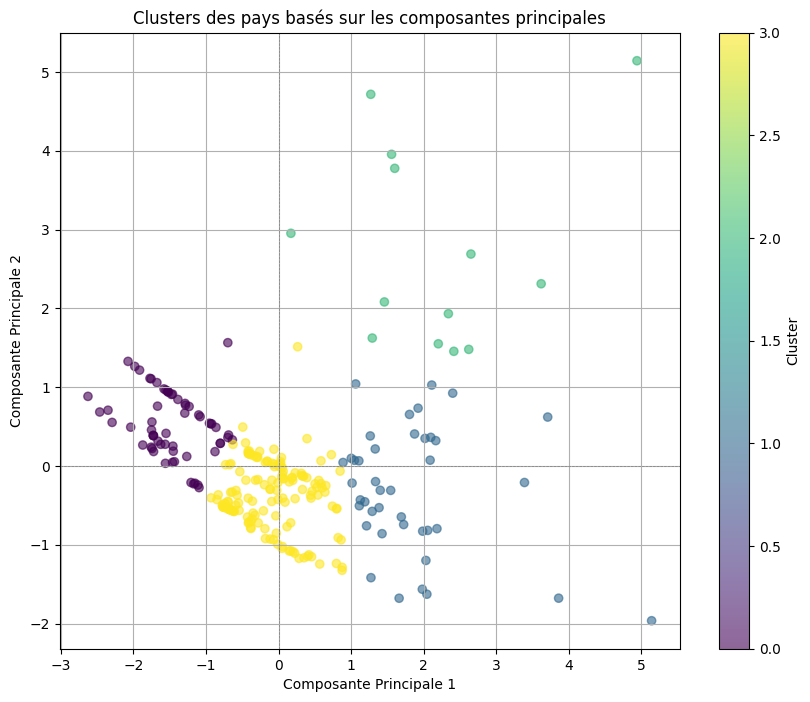

In [21]:
from sklearn.cluster import KMeans
#Appliquer k-means avec 4 clusters (4 classes de pays : high income, low income, upper middle income et lower middle income)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Visualiser les clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Clusters des pays basés sur les composantes principales')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid()
plt.colorbar(label='Cluster')
plt.show()

Le graphique de clustering indique des regroupements distincts de pays basés sur leurs profils énergétiques et niveaux de développement. Les clusters montrent que les pays partagent des similarités, mais affichent aussi une certaine hétérogénéité interne. Les composantes principales révèlent que le PIB par habitant et le taux de scolarisation influencent fortement la première composante, tandis que les investissements en énergies renouvelables ont un impact significatif sur la deuxième. Ces différences illustrent comment les progrès énergétiques et les politiques varient entre les groupes de pays